In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv('Data_Sets/UNSW_NB15_training-set.csv')


In [3]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

| No. | Name               | Type      | Description |
|-----|--------------------|-----------|-------------|
| 1   | srcip              | nominal   | Source IP address |
| 2   | sport              | integer   | Source port number |
| 3   | dstip              | nominal   | Destination IP address |
| 4   | dsport             | integer   | Destination port number |
| 5   | proto              | nominal   | Transaction protocol |
| 6   | state              | nominal   | Indicates the state and its dependent protocol (e.g. ACC, CLO, CON, ECO, etc.) or '-' if not used |
| 7   | dur                | float     | Record total duration |
| 8   | sbytes             | integer   | Source to destination transaction bytes |
| 9   | dbytes             | integer   | Destination to source transaction bytes |
| 10  | sttl               | integer   | Source to destination time to live value |
| 11  | dttl               | integer   | Destination to source time to live value |
| 12  | sloss              | integer   | Source packets retransmitted or dropped |
| 13  | dloss              | integer   | Destination packets retransmitted or dropped |
| 14  | service            | nominal   | Service used (http, ftp, ssh, dns, etc.) or '-' if not used |
| 15  | Sload              | float     | Source bits per second |
| 16  | Dload              | float     | Destination bits per second |
| 17  | Spkts              | integer   | Source to destination packet count |
| 18  | Dpkts              | integer   | Destination to source packet count |
| 19  | swin               | integer   | Source TCP window advertisement value |
| 20  | dwin               | integer   | Destination TCP window advertisement value |
| 21  | stcpb              | integer   | Source TCP base sequence number |
| 22  | dtcpb              | integer   | Destination TCP base sequence number |
| 23  | smeansz            | integer   | Mean of the flow packet size transmitted by the source |
| 24  | dmeansz            | integer   | Mean of the flow packet size transmitted by the destination |
| 25  | trans_depth        | integer   | Pipelined depth into the connection of HTTP transaction |
| 26  | res_bdy_len        | integer   | Actual uncompressed content size transferred from HTTP service |
| 27  | Sjit               | float     | Source jitter (ms) |
| 28  | Djit               | float     | Destination jitter (ms) |
| 29  | Stime              | timestamp | Record start time |
| 30  | Ltime              | timestamp | Record last time |
| 31  | Sintpkt            | float     | Source interpacket arrival time (ms) |
| 32  | Dintpkt            | float     | Destination interpacket arrival time (ms) |
| 33  | tcprtt             | float     | TCP setup round-trip time (synack + ackdat) |
| 34  | synack             | float     | Time between SYN and SYN_ACK packets |
| 35  | ackdat             | float     | Time between SYN_ACK and ACK packets |
| 36  | is_sm_ips_ports    | binary    | 1 if source and destination IPs and ports are equal, else 0 |
| 37  | ct_state_ttl       | integer   | Count of states with specific TTL ranges |
| 38  | ct_flw_http_mthd   | integer   | Count of flows with HTTP methods like GET and POST |
| 39  | is_ftp_login       | binary    | 1 if FTP session includes login, else 0 |
| 40  | ct_ftp_cmd         | integer   | Count of FTP command flows |
| 41  | ct_srv_src         | integer   | Connections with same service and source IP in last 100 connections |
| 42  | ct_srv_dst         | integer   | Connections with same service and destination IP in last 100 connections |
| 43  | ct_dst_ltm         | integer   | Connections with same destination IP in last 100 connections |
| 44  | ct_src_ltm         | integer   | Connections with same source IP in last 100 connections |
| 45  | ct_src_dport_ltm   | integer   | Connections with same source IP and destination port in last 100 |
| 46  | ct_dst_sport_ltm   | integer   | Connections with same destination IP and source port in last 100 |
| 47  | ct_dst_src_ltm     | integer   | Connections with same source and destination IPs in last 100 |
| 48  | attack_cat         | nominal   | Attack category name (e.g. Fuzzers, DoS, Worms, etc.) |
| 49  | Label              | binary    | 0 for normal, 1 for attack |


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
df.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

In [6]:
df.shape

(175341, 45)

In [7]:
df.describe()

id            dur          spkts          dpkts  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean    87671.000000       1.359389      20.298664      18.969591   
std     50616.731112       6.480249     136.887597     110.258271   
min         1.000000       0.000000       1.000000       0.000000   
25%     43836.000000       0.000008       2.000000       0.000000   
50%     87671.000000       0.001582       2.000000       2.000000   
75%    131506.000000       0.668069      12.000000      10.000000   
max    175341.000000      59.999989    9616.000000   10974.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  1.753410e+05  1.753410e+05  1.753410e+05  175341.000000  175341.000000   
mean   8.844844e+03  1.492892e+04  9.540619e+04     179.546997      79.609567   
std    1.747656e+05  1.436542e+05  1.654010e+05     102.940011     110.506863   
min    2.800000e+01  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    1.140000e+02  0.000000e+00  3.278614e+01      62.000000       0.000000   
50%    4.300000e+02  1.640000e+02  3.225807e+03     254.000000      29.000000   
75%    1.418000e+03  1.102000e+03  1.250000e+05     254.000000     252.000000   
max    1.296523e+07  1.465555e+07  1.000000e+06     255.000000     254.000000   

              sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
count  1.753410e+05  ...     175341.000000     175341.000000   175341.000000   
mean   7.345403e+07  ...          5.383538          4.206255        8.729881   
std    1.883574e+08  ...          8.047104          5.783585       10.956186   
min    0.000000e+00  ...          1.000000          1.000000        1.000000   
25%    1.305334e+04  ...          1.000000          1.000000        1.000000   
50%    8.796748e+05  ...          1.000000          1.000000        3.000000   
75%    8.888889e+07  ...          5.000000          3.000000       12.000000   
max    5.988000e+09  ...         51.000000         46.000000       65.000000   

        is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd     ct_src_ltm  \
count  175341.000000  175341.000000     175341.000000  175341.000000   
mean        0.014948       0.014948          0.133066       6.955789   
std         0.126048       0.126048          0.701208       8.321493   
min         0.000000       0.000000          0.000000       1.000000   
25%         0.000000       0.000000          0.000000       2.000000   
50%         0.000000       0.000000          0.000000       3.000000   
75%         0.000000       0.000000          0.000000       9.000000   
max         4.000000       4.000000         30.000000      60.000000   

          ct_srv_dst  is_sm_ips_ports          label  
count  175341.000000    175341.000000  175341.000000  
mean        9.100758         0.015752       0.680622  
std        10.756952         0.124516       0.466237  
min         1.000000         0.000000       0.000000  
25%         2.000000         0.000000       0.000000  
50%         4.000000         0.000000       1.000000  
75%        12.000000         0.000000       1.000000  
max        62.000000         1.000000       1.000000  

[8 rows x 41 columns]

In [8]:
df.describe(include='object')

proto service   state attack_cat
count   175341  175341  175341     175341
unique     133      13       9         10
top        tcp       -     INT     Normal
freq     79946   94168   82275      56000

In [9]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [10]:
df.shape

(175341, 45)

In [11]:
df.isna().sum().sum()

np.int64(0)

In [12]:
df.drop('id',axis=1,inplace=True)

In [13]:
df

dur proto service state  spkts  dpkts  sbytes  dbytes  \
0       0.121478   tcp       -   FIN      6      4     258     172   
1       0.649902   tcp       -   FIN     14     38     734   42014   
2       1.623129   tcp       -   FIN      8     16     364   13186   
3       1.681642   tcp     ftp   FIN     12     12     628     770   
4       0.449454   tcp       -   FIN     10      6     534     268   
...          ...   ...     ...   ...    ...    ...     ...     ...   
175336  0.000009   udp     dns   INT      2      0     114       0   
175337  0.505762   tcp       -   FIN     10      8     620     354   
175338  0.000009   udp     dns   INT      2      0     114       0   
175339  0.000009   udp     dns   INT      2      0     114       0   
175340  0.000009   udp     dns   INT      2      0     114       0   

                 rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
0           74.087490   252  ...                 1               1   
1           78.473372    62  ...                 1               2   
2           14.170161    62  ...                 1               3   
3           13.677108    62  ...                 1               3   
4           33.373826   254  ...                 1              40   
...               ...   ...  ...               ...             ...   
175336  111111.107200   254  ...                13              24   
175337      33.612649   254  ...                 1               2   
175338  111111.107200   254  ...                 3              13   
175339  111111.107200   254  ...                14              30   
175340  111111.107200   254  ...                16              30   

        is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0                  0           0                 0           1           1   
1                  0           0                 0           1           6   
2                  0           0                 0           2           6   
3                  1           1                 0           2           1   
4                  0           0                 0           2          39   
...              ...         ...               ...         ...         ...   
175336             0           0                 0          24          24   
175337             0           0                 0           1           1   
175338             0           0                 0           3          12   
175339             0           0                 0          30          30   
175340             0           0                 0          30          30   

        is_sm_ips_ports  attack_cat  label  
0                     0      Normal      0  
1                     0      Normal      0  
2                     0      Normal      0  
3                     0      Normal      0  
4                     0      Normal      0  
...                 ...         ...    ...  
175336                0     Generic      1  
175337                0   Shellcode      1  
175338                0     Generic      1  
175339                0     Generic      1  
175340                0     Generic      1  

[175341 rows x 44 columns]

In [14]:
df.duplicated().sum()

np.int64(67601)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(107740, 44)

In [17]:
# Detect outliers using Z-score

from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

outliers = (z_scores > 3).sum(axis=0)

print("Outliers detected in features:\n", outliers)

Outliers detected in features:
 dur                  1582
spkts                 316
dpkts                1169
sbytes                233
dbytes               1056
rate                 1543
sttl                    0
dttl                    0
sload                2072
dload                4196
sloss                 266
dloss                1060
sinpkt                694
dinpkt                392
sjit                  615
djit                  585
swin                    0
stcpb                   0
dtcpb                   0
dwin                    0
tcprtt                701
synack                790
ackdat                823
smean                3951
dmean                2991
trans_depth            10
response_body_len     513
ct_srv_src           3094
ct_state_ttl          894
ct_dst_ltm           2803
ct_src_dport_ltm     2614
ct_dst_sport_ltm     2610
ct_dst_src_ltm       3430
is_ftp_login         1846
ct_ftp_cmd           1846
ct_flw_http_mthd      617
ct_src_ltm           3129
ct_srv

In [18]:
# Check for outliers using IQR method

def detect_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)

    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return len(outliers)



numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:

    outlier_count = detect_outliers_iqr(df, column)

    print(f"Outliers in {column}: {outlier_count}")

Outliers in dur: 7944
Outliers in spkts: 14856
Outliers in dpkts: 14015
Outliers in sbytes: 12556
Outliers in dbytes: 20456
Outliers in rate: 18746
Outliers in sttl: 0
Outliers in dttl: 0
Outliers in sload: 21148
Outliers in dload: 14003
Outliers in sloss: 7669
Outliers in dloss: 12663
Outliers in sinpkt: 5598
Outliers in dinpkt: 4261
Outliers in sjit: 5062
Outliers in djit: 14279
Outliers in swin: 0
Outliers in stcpb: 0
Outliers in dtcpb: 0
Outliers in dwin: 0
Outliers in tcprtt: 985
Outliers in synack: 1572
Outliers in ackdat: 1702
Outliers in smean: 15414
Outliers in dmean: 20804
Outliers in trans_depth: 17249
Outliers in response_body_len: 10824
Outliers in ct_srv_src: 6637
Outliers in ct_state_ttl: 2051
Outliers in ct_dst_ltm: 9910
Outliers in ct_src_dport_ltm: 8834
Outliers in ct_dst_sport_ltm: 10932
Outliers in ct_dst_src_ltm: 9204
Outliers in is_ftp_login: 1846
Outliers in ct_ftp_cmd: 1846
Outliers in ct_flw_http_mthd: 17249
Outliers in ct_src_ltm: 10362
Outliers in ct_srv_dst:

In [19]:
df['proto'].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [20]:
df['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [21]:
df['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no'],
      dtype=object)

In [22]:
df['service'].unique()

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [23]:
df['service']=df['service'].replace('-','other')

In [24]:
df

dur proto service state  spkts  dpkts  sbytes  dbytes  \
0       0.121478   tcp   other   FIN      6      4     258     172   
1       0.649902   tcp   other   FIN     14     38     734   42014   
2       1.623129   tcp   other   FIN      8     16     364   13186   
3       1.681642   tcp     ftp   FIN     12     12     628     770   
4       0.449454   tcp   other   FIN     10      6     534     268   
...          ...   ...     ...   ...    ...    ...     ...     ...   
175267  1.914309   tcp    smtp   FIN     74     30   69997    2132   
175277  3.719110   tcp   other   FIN     66    340    3086  426483   
175299  0.996503   tcp    pop3   FIN     20     30     942   16684   
175305  1.557125   tcp    smtp   FIN     28     22   12601    1954   
175337  0.505762   tcp   other   FIN     10      8     620     354   

              rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0        74.087490   252  ...                 1               1             0   
1        78.473372    62  ...                 1               2             0   
2        14.170161    62  ...                 1               3             0   
3        13.677108    62  ...                 1               3             1   
4        33.373826   254  ...                 1              40             0   
...            ...   ...  ...               ...             ...           ...   
175267   53.805315    62  ...                 1               1             0   
175277  108.897021    62  ...                 1               1             0   
175299   49.171955    62  ...                 1               1             0   
175305   31.468251    62  ...                 1               2             0   
175337   33.612649   254  ...                 1               2             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175267           0                 0          18           1                0   
175277           0                 0           2           1                0   
175299           0                 0           7           1                0   
175305           0                 0           2           1                0   
175337           0                 0           1           1                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
175267    Exploits      1  
175277    Exploits      1  
175299    Exploits      1  
175305    Exploits      1  
175337   Shellcode      1  

[107740 rows x 44 columns]

In [25]:
df['label'].unique()

array([0, 1])

In [26]:
df_attack_count=df['label'].value_counts()


In [27]:
df_attack_count

label
1    55850
0    51890
Name: count, dtype: int64

In [28]:
fig = px.pie(df_attack_count, values=df_attack_count.values, names=df_attack_count.index, title='Distribution of Label')
fig.show()

Here in the pie graph 
*0-represent normal* ,
*1-represent attack*

Grouping by attack category

In [29]:
df[df['attack_cat']!='normal'].groupby('attack_cat').size()

attack_cat
Analysis           1594
Backdoor           1535
DoS                3806
Exploits          19844
Fuzzers           16150
Generic            4181
Normal            51890
Reconnaissance     7522
Shellcode          1091
Worms               127
dtype: int64

In [30]:
df_attack_by_category=df[df['attack_cat']!='normal'].groupby('attack_cat').size().reset_index(name='counts').sort_values(by='counts',ascending=False)
fig=px.bar(df_attack_by_category,x='attack_cat',y='counts',title='Distribution of attack categories')
fig.show()

Distribution of source bytes by attack category

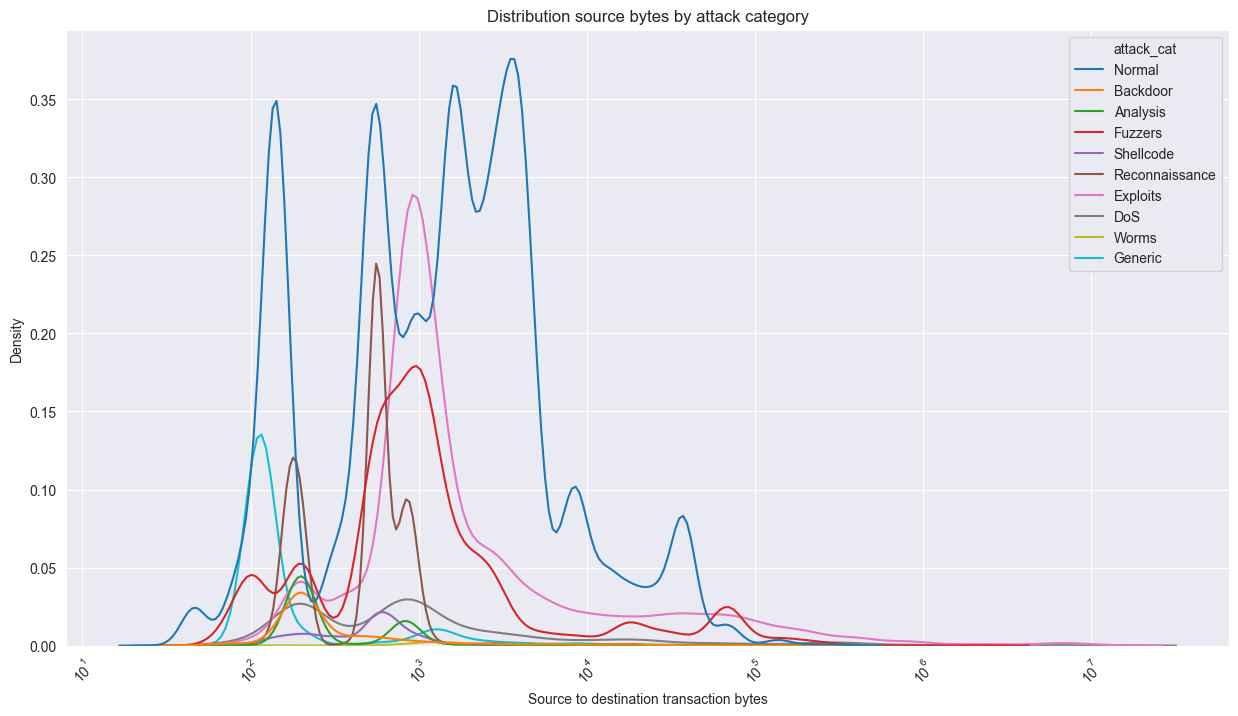

In [31]:


plt.figure(figsize=(15,8))
ax = sns.kdeplot(x='sbytes',hue='attack_cat',log_scale=True,data=df[df['attack_cat']!='normal'])
ax.set_title('Distribution source bytes by attack category')
ax.set_xlabel('Source to destination transaction bytes')
ax.set_ylabel('Density')
plt.xticks(rotation=45)
plt.show()



Most used service by attack category

In [32]:
df_attacks_cat_services = df[(df['attack_cat']!='normal')].groupby(['attack_cat','service']).size().reset_index(name='Count')

In [33]:
df_attacks_cat_services

attack_cat service  Count
0         Analysis    http    392
1         Analysis   other   1196
2         Analysis    smtp      6
3         Backdoor     ftp      5
4         Backdoor    http     79
..             ...     ...    ...
59  Reconnaissance    smtp      5
60  Reconnaissance    snmp     47
61       Shellcode   other   1091
62           Worms    http    111
63           Worms   other     16

[64 rows x 3 columns]

In [34]:
# Create a 3x3 subplot grid
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Category: Analysis', 'Category: Backdoor', 'Category: DoS',
                                    'Category: Exploits', 'Category: Fuzzers', 'Category: Generic',
                                    'Category: Reconnaissance', 'Category: Shellcode', 'Category: Worms'))

# Create a list of attack categories to loop through
categories = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

# Define row and column positions for each plot
positions = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3)]

# Loop through the categories and create a bar plot for each one
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category
    df_filtered = df_attacks_cat_services[df_attacks_cat_services['attack_cat'] == category]

    # Add bar plot to the subplot
    fig.add_trace(go.Bar(x=df_filtered['service'], y=df_filtered['Count'], name=category,
                         marker_color=px.colors.qualitative.Plotly[i]),
                  row=positions[i][0], col=positions[i][1])

# Update layout
fig.update_layout(height=900, width=900, title_text="Service Counts by Attack Categories", showlegend=False)

# Update x-axis for all subplots
fig.update_xaxes(tickangle=90)

# Show the figure
fig.show()



Top-5 protocols used by attack category


In [35]:
df_attacks_cat_protocol=df[df['attack_cat']!='normal'].groupby(['attack_cat','proto']).size().reset_index(name='count')
df_attacks_cat_protocol

attack_cat      proto  count
0          Analysis        3pc      5
1          Analysis        a/n      5
2          Analysis  aes-sp3-d      5
3          Analysis        any     15
4          Analysis      argus      5
..              ...        ...    ...
901  Reconnaissance       zero      5
902       Shellcode        tcp    557
903       Shellcode        udp    534
904           Worms        tcp    112
905           Worms        udp     15

[906 rows x 3 columns]

In [36]:
# Create a 3x3 subplot grid
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Category: Analysis', 'Category: Backdoor', 'Category: DoS',
                                    'Category: Exploits', 'Category: Fuzzers', 'Category: Generic',
                                    'Category: Reconnaissance', 'Category: Shellcode', 'Category: Worms'))

# Create a list of attack categories to loop through
categories = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

# Define row and column positions for each plot
positions = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3)]

# Loop through the categories and create a bar plot for each one (top 5 protocols)
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category and take the top 5 protocols
    df_filtered = df_attacks_cat_protocol[df_attacks_cat_protocol['attack_cat'] == category][:5]

    # Add bar plot to the subplot
    fig.add_trace(go.Bar(x=df_filtered['proto'], y=df_filtered['count'], name=category,
                         marker_color=px.colors.qualitative.Plotly[i]),
                  row=positions[i][0], col=positions[i][1])

# Update layout
fig.update_layout(height=900, width=900, title_text="Top 5 Protocols by Attack Categories", showlegend=False)

# Update x-axis for all subplots
fig.update_xaxes(tickangle=90)

# Show the figure
fig.show()

Distribution of attack categories by state

In [37]:
df_attack_cat_state=df[df['attack_cat']!='normal'].groupby(['attack_cat','state']).size().reset_index(name='count')

In [38]:
# Create a 3x3 subplot grid
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Category: Analysis', 'Category: Backdoor', 'Category: DoS',
                                    'Category: Exploits', 'Category: Fuzzers', 'Category: Generic',
                                    'Category: Reconnaissance', 'Category: Shellcode', 'Category: Worms'))

# List of attack categories
categories = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

# Define the row and column positions for the plots
positions = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3)]

# Loop through the attack categories and create a bar plot for each one
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category
    df_filtered = df_attack_cat_state[df_attack_cat_state['attack_cat'] == category]

    # Add bar plot to the subplot
    fig.add_trace(go.Bar(x=df_filtered['state'], y=df_filtered['count'], name=category,
                         marker_color=px.colors.qualitative.Plotly[i]),
                  row=positions[i][0], col=positions[i][1])

# Update the layout of the entire figure
fig.update_layout(height=900, width=900, title_text="Attack Counts by State and Category", showlegend=False)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()



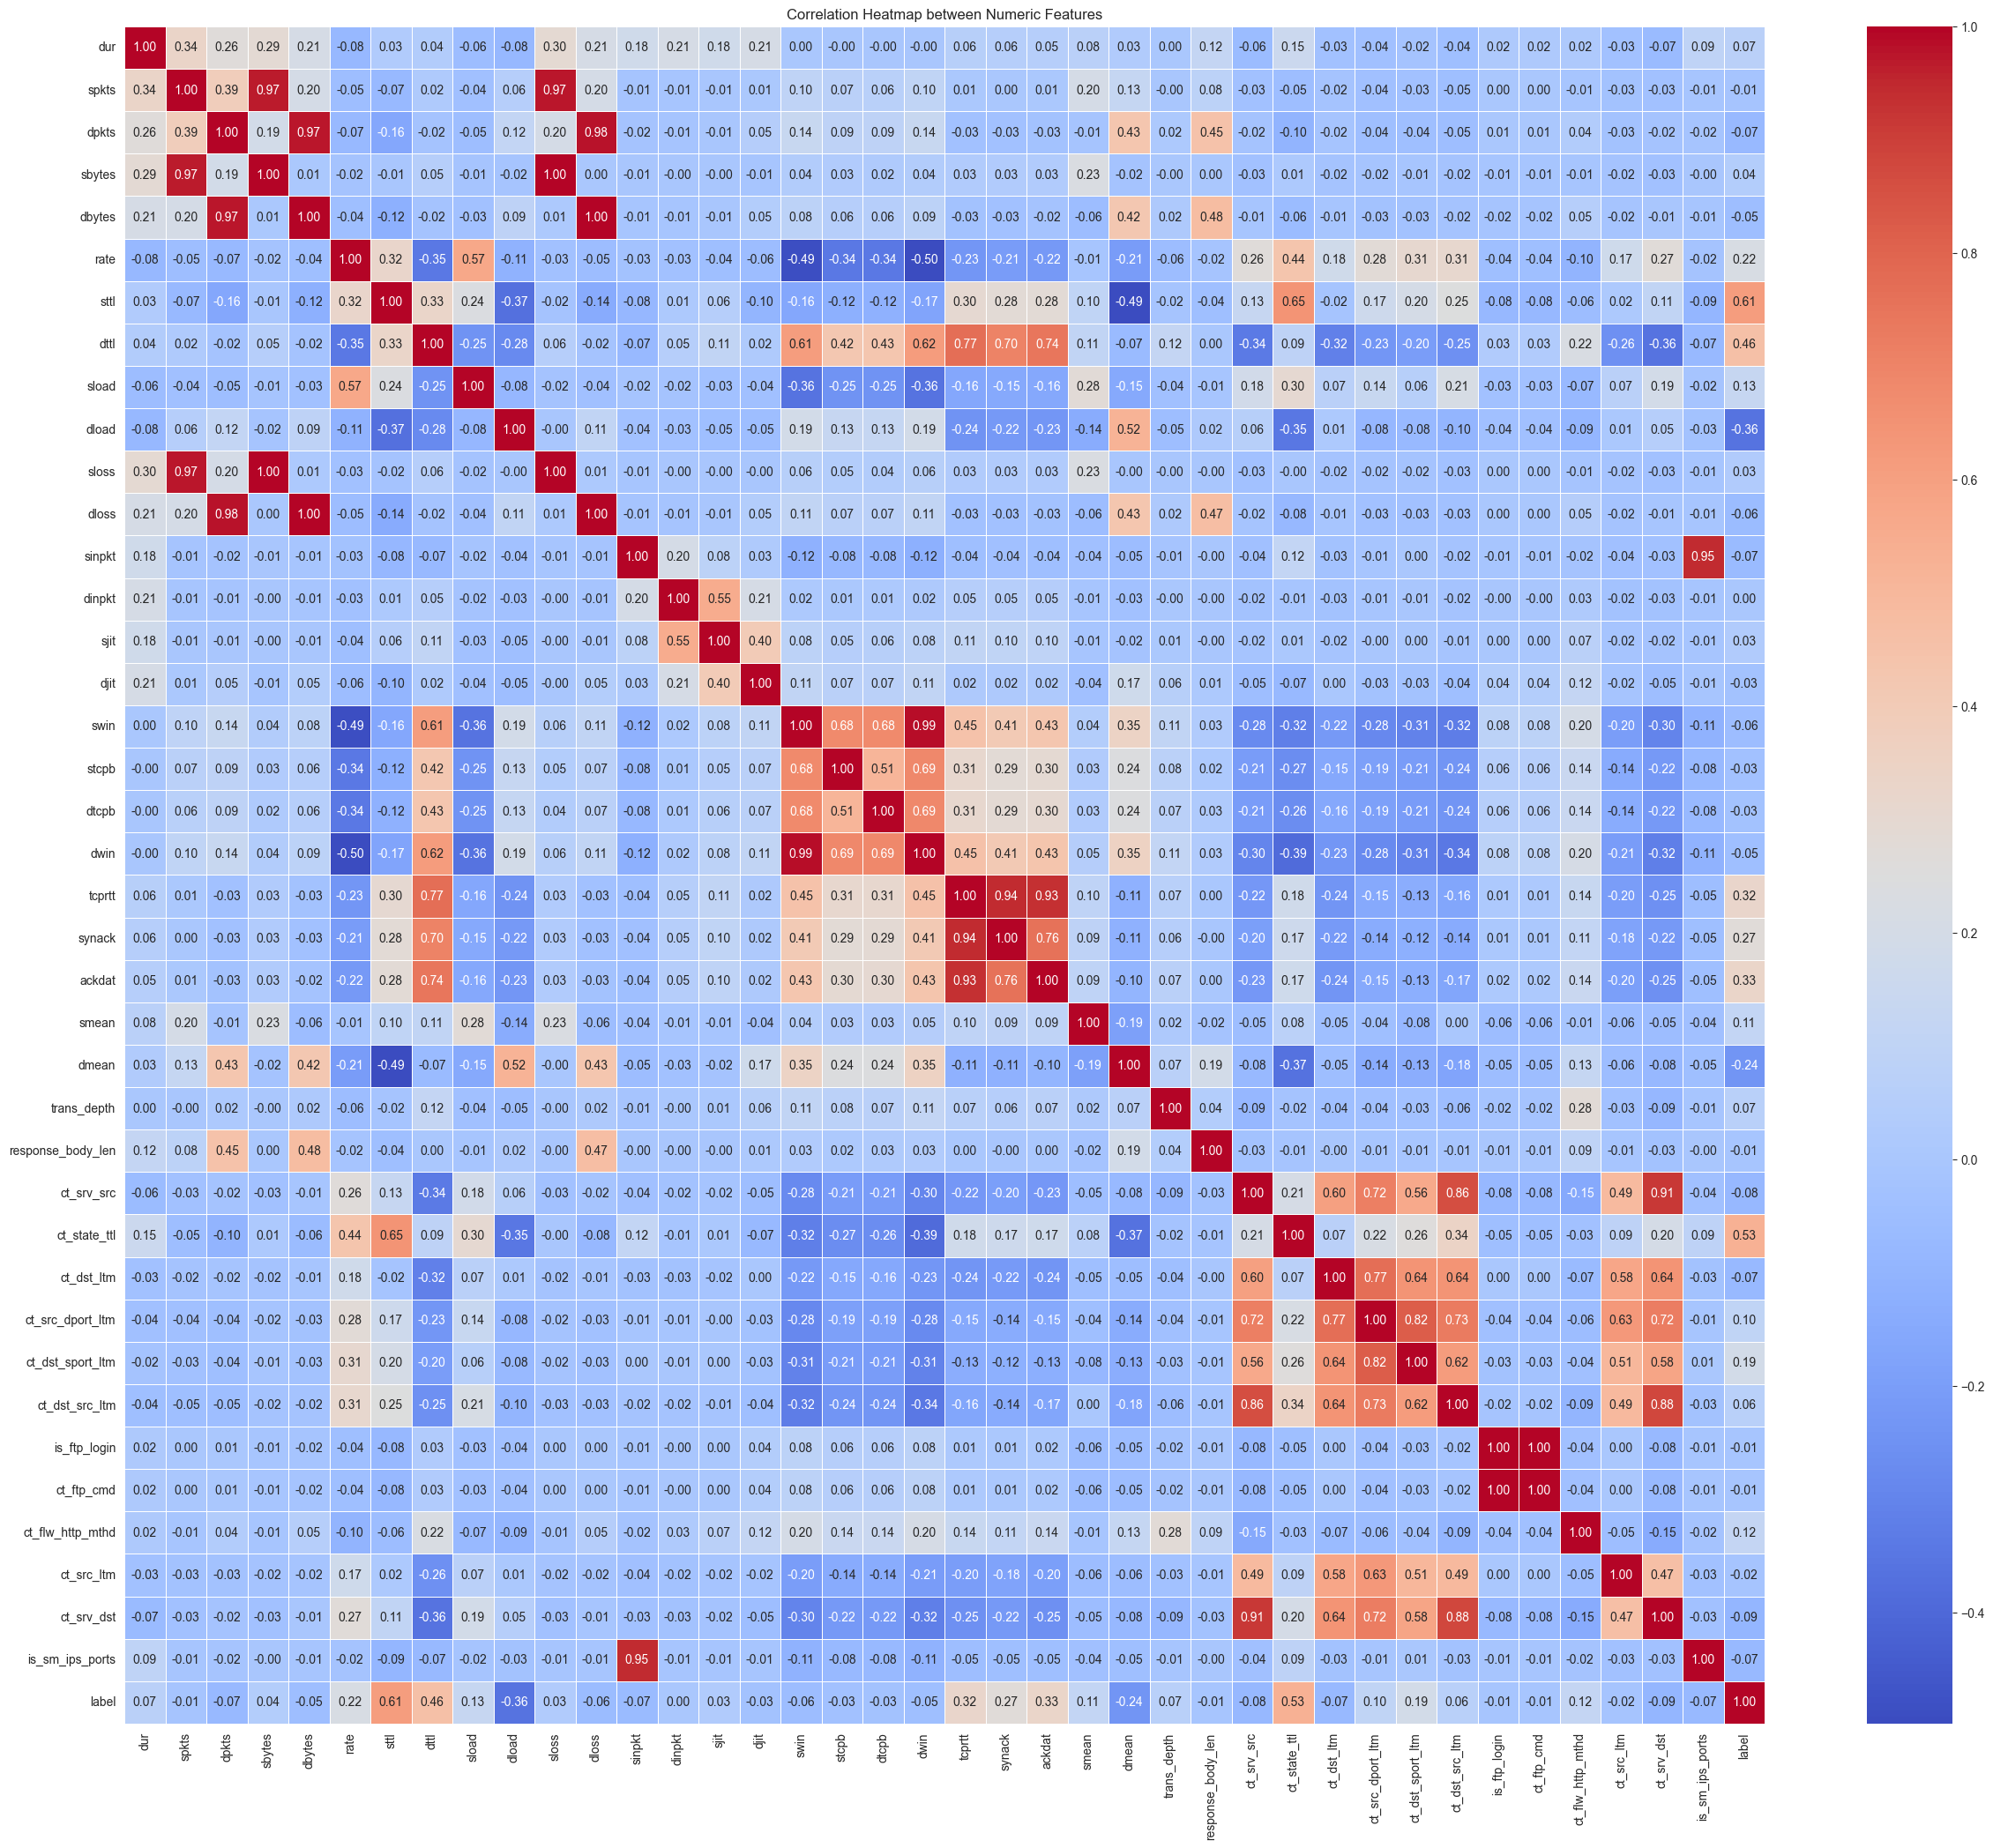

In [39]:
numerical_columns = [col for col in df.columns if df[col].dtypes != "object"]
# Calculate the correlation matrix for numerical columns
corr = df[numerical_columns].corr()

plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap between Numeric Features')
plt.show()

In [40]:
corr_matrix = df[numerical_columns].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper_triangle.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.80]
high_corr_pairs

Feature 1         Feature 2  Correlation
40              spkts            sbytes     0.966473
47              spkts             sloss     0.973819
78              dpkts            dbytes     0.971849
85              dpkts             dloss     0.977961
120            sbytes             sloss     0.996875
156            dbytes             dloss     0.996611
427            sinpkt   is_sm_ips_ports     0.945985
506              swin              dwin     0.986841
590            tcprtt            synack     0.942227
591            tcprtt            ackdat     0.932464
706        ct_srv_src    ct_dst_src_ltm     0.863033
711        ct_srv_src        ct_srv_dst     0.913092
735  ct_src_dport_ltm  ct_dst_sport_ltm     0.823545
756    ct_dst_src_ltm        ct_srv_dst     0.880755
759      is_ftp_login        ct_ftp_cmd     1.000000

In [41]:
features_to_drop = ['ct_state_ttl', 'ct_dst_sport_ltm', 'ct_src_ltm']
df = df.drop(features_to_drop, axis=1)

In [42]:
df

dur proto service state  spkts  dpkts  sbytes  dbytes  \
0       0.121478   tcp   other   FIN      6      4     258     172   
1       0.649902   tcp   other   FIN     14     38     734   42014   
2       1.623129   tcp   other   FIN      8     16     364   13186   
3       1.681642   tcp     ftp   FIN     12     12     628     770   
4       0.449454   tcp   other   FIN     10      6     534     268   
...          ...   ...     ...   ...    ...    ...     ...     ...   
175267  1.914309   tcp    smtp   FIN     74     30   69997    2132   
175277  3.719110   tcp   other   FIN     66    340    3086  426483   
175299  0.996503   tcp    pop3   FIN     20     30     942   16684   
175305  1.557125   tcp    smtp   FIN     28     22   12601    1954   
175337  0.505762   tcp   other   FIN     10      8     620     354   

              rate  sttl  ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_src_ltm  \
0        74.087490   252  ...           1                 1               1   
1        78.473372    62  ...           1                 1               2   
2        14.170161    62  ...           2                 1               3   
3        13.677108    62  ...           2                 1               3   
4        33.373826   254  ...           2                 2              40   
...            ...   ...  ...         ...               ...             ...   
175267   53.805315    62  ...           1                 1               1   
175277  108.897021    62  ...           1                 1               1   
175299   49.171955    62  ...           1                 1               1   
175305   31.468251    62  ...           2                 1               2   
175337   33.612649   254  ...           1                 1               2   

        is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_srv_dst  \
0                  0           0                 0           1   
1                  0           0                 0           6   
2                  0           0                 0           6   
3                  1           1                 0           1   
4                  0           0                 0          39   
...              ...         ...               ...         ...   
175267             0           0                 0           1   
175277             0           0                 0           1   
175299             0           0                 0           1   
175305             0           0                 0           1   
175337             0           0                 0           1   

        is_sm_ips_ports  attack_cat  label  
0                     0      Normal      0  
1                     0      Normal      0  
2                     0      Normal      0  
3                     0      Normal      0  
4                     0      Normal      0  
...                 ...         ...    ...  
175267                0    Exploits      1  
175277                0    Exploits      1  
175299                0    Exploits      1  
175305                0    Exploits      1  
175337                0   Shellcode      1  

[107740 rows x 41 columns]

Preprocessing of  model

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
categorical_col=df.select_dtypes(include='object').columns

In [45]:
categorical_col

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [46]:
df.shape

(107740, 41)

In [47]:
df=pd.get_dummies(df, columns=['proto', 'service'], drop_first=True) # one hot encoding

In [48]:
df

dur state  spkts  dpkts  sbytes  dbytes        rate  sttl  dttl  \
0       0.121478   FIN      6      4     258     172   74.087490   252   254   
1       0.649902   FIN     14     38     734   42014   78.473372    62   252   
2       1.623129   FIN      8     16     364   13186   14.170161    62   252   
3       1.681642   FIN     12     12     628     770   13.677108    62   252   
4       0.449454   FIN     10      6     534     268   33.373826   254   252   
...          ...   ...    ...    ...     ...     ...         ...   ...   ...   
175267  1.914309   FIN     74     30   69997    2132   53.805315    62   252   
175277  3.719110   FIN     66    340    3086  426483  108.897021    62   252   
175299  0.996503   FIN     20     30     942   16684   49.171955    62   252   
175305  1.557125   FIN     28     22   12601    1954   31.468251    62   252   
175337  0.505762   FIN     10      8     620     354   33.612649   254   252   

                sload  ...  service_ftp-data  service_http  service_irc  \
0        14158.942380  ...             False         False        False   
1         8395.112305  ...             False         False        False   
2         1572.271851  ...             False         False        False   
3         2740.178955  ...             False         False        False   
4         8561.499023  ...             False         False        False   
...               ...  ...               ...           ...          ...   
175267  288572.000000  ...             False         False        False   
175277    6539.198730  ...             False         False        False   
175299    7185.126465  ...             False         False        False   
175305   62427.871090  ...             False         False        False   
175337    8826.286133  ...             False         False        False   

        service_other  service_pop3  service_radius  service_smtp  \
0                True         False           False         False   
1                True         False           False         False   
2                True         False           False         False   
3               False         False           False         False   
4                True         False           False         False   
...               ...           ...             ...           ...   
175267          False         False           False          True   
175277           True         False           False         False   
175299          False          True           False         False   
175305          False         False           False          True   
175337           True         False           False         False   

        service_snmp  service_ssh  service_ssl  
0              False        False        False  
1              False        False        False  
2              False        False        False  
3              False        False        False  
4              False        False        False  
...              ...          ...          ...  
175267         False        False        False  
175277         False        False        False  
175299         False        False        False  
175305         False        False        False  
175337         False        False        False  

[107740 rows x 183 columns]

In [49]:
df.shape

(107740, 183)

In [50]:
label_encoder = LabelEncoder()

In [51]:
df['state'] = label_encoder.fit_transform(df['state'])
df['attack_cat'] = label_encoder.fit_transform(df['attack_cat'])

In [52]:
df

dur  state  spkts  dpkts  sbytes  dbytes        rate  sttl  dttl  \
0       0.121478      2      6      4     258     172   74.087490   252   254   
1       0.649902      2     14     38     734   42014   78.473372    62   252   
2       1.623129      2      8     16     364   13186   14.170161    62   252   
3       1.681642      2     12     12     628     770   13.677108    62   252   
4       0.449454      2     10      6     534     268   33.373826   254   252   
...          ...    ...    ...    ...     ...     ...         ...   ...   ...   
175267  1.914309      2     74     30   69997    2132   53.805315    62   252   
175277  3.719110      2     66    340    3086  426483  108.897021    62   252   
175299  0.996503      2     20     30     942   16684   49.171955    62   252   
175305  1.557125      2     28     22   12601    1954   31.468251    62   252   
175337  0.505762      2     10      8     620     354   33.612649   254   252   

                sload  ...  service_ftp-data  service_http  service_irc  \
0        14158.942380  ...             False         False        False   
1         8395.112305  ...             False         False        False   
2         1572.271851  ...             False         False        False   
3         2740.178955  ...             False         False        False   
4         8561.499023  ...             False         False        False   
...               ...  ...               ...           ...          ...   
175267  288572.000000  ...             False         False        False   
175277    6539.198730  ...             False         False        False   
175299    7185.126465  ...             False         False        False   
175305   62427.871090  ...             False         False        False   
175337    8826.286133  ...             False         False        False   

        service_other  service_pop3  service_radius  service_smtp  \
0                True         False           False         False   
1                True         False           False         False   
2                True         False           False         False   
3               False         False           False         False   
4                True         False           False         False   
...               ...           ...             ...           ...   
175267          False         False           False          True   
175277           True         False           False         False   
175299          False          True           False         False   
175305          False         False           False          True   
175337           True         False           False         False   

        service_snmp  service_ssh  service_ssl  
0              False        False        False  
1              False        False        False  
2              False        False        False  
3              False        False        False  
4              False        False        False  
...              ...          ...          ...  
175267         False        False        False  
175277         False        False        False  
175299         False        False        False  
175305         False        False        False  
175337         False        False        False  

[107740 rows x 183 columns]


Feature Engineering

In [53]:
# Interaction between source and destination load
df['load_interaction'] = df['sload'] * df['dload']

In [54]:
# Total transaction bytes between source and destination
df['total_bytes'] = df['sbytes'] + df['dbytes']

In [55]:
df

dur  state  spkts  dpkts  sbytes  dbytes        rate  sttl  dttl  \
0       0.121478      2      6      4     258     172   74.087490   252   254   
1       0.649902      2     14     38     734   42014   78.473372    62   252   
2       1.623129      2      8     16     364   13186   14.170161    62   252   
3       1.681642      2     12     12     628     770   13.677108    62   252   
4       0.449454      2     10      6     534     268   33.373826   254   252   
...          ...    ...    ...    ...     ...     ...         ...   ...   ...   
175267  1.914309      2     74     30   69997    2132   53.805315    62   252   
175277  3.719110      2     66    340    3086  426483  108.897021    62   252   
175299  0.996503      2     20     30     942   16684   49.171955    62   252   
175305  1.557125      2     28     22   12601    1954   31.468251    62   252   
175337  0.505762      2     10      8     620     354   33.612649   254   252   

                sload  ...  service_irc  service_other  service_pop3  \
0        14158.942380  ...        False           True         False   
1         8395.112305  ...        False           True         False   
2         1572.271851  ...        False           True         False   
3         2740.178955  ...        False          False         False   
4         8561.499023  ...        False           True         False   
...               ...  ...          ...            ...           ...   
175267  288572.000000  ...        False          False         False   
175277    6539.198730  ...        False           True         False   
175299    7185.126465  ...        False          False          True   
175305   62427.871090  ...        False          False         False   
175337    8826.286133  ...        False           True         False   

        service_radius  service_smtp  service_snmp  service_ssh  service_ssl  \
0                False         False         False        False        False   
1                False         False         False        False        False   
2                False         False         False        False        False   
3                False         False         False        False        False   
4                False         False         False        False        False   
...                ...           ...           ...          ...          ...   
175267           False          True         False        False        False   
175277           False         False         False        False        False   
175299           False         False         False        False        False   
175305           False          True         False        False        False   
175337           False         False         False        False        False   

        load_interaction  total_bytes  
0           1.202854e+08          430  
1           4.227538e+09        42748  
2           9.579731e+07        13550  
3           9.203226e+06         1398  
4           3.413521e+07          802  
...                  ...          ...  
175267      2.485479e+09        72129  
175277      5.981338e+09       429569  
175299      9.303070e+08        17626  
175305      5.984897e+08        14555  
175337      4.327963e+07          974  

[107740 rows x 185 columns]

In [56]:
# Packet flow ratio between source and destination
df['pkt_flow_ratio'] = df['spkts'] / (df['dpkts'] + 1)

In [57]:
# Bytes difference and ratio
df['bytes_diff'] = df['sbytes'] - df['dbytes']
df['bytes_ratio'] = df['sbytes'] / (df['dbytes'] + 1)

In [58]:
# TTL difference
df['ttl_diff'] = df['sttl'] - df['dttl']

In [59]:
# Jitter difference and ratio
df['jitter_diff'] = df['sjit'] - df['djit']
df['jitter_ratio'] = df['sjit'] / (df['djit'] + 1)

In [60]:
# Difference between synack and ackdat times
df['tcp_time_diff'] = df['synack'] - df['ackdat']

In [61]:
df.shape

(107740, 192)

In [62]:
df.sample(10)

dur  state  spkts  dpkts  sbytes  dbytes           rate  sttl  \
97420   0.720448      2     10      8     564     354      23.596428   254   
9709    0.001019      0      2      2     146     178    2944.062924    31   
102892  4.825919      2     10      8     618     354       3.522645   254   
15335   0.045021      2     90     92    5174   83812    4020.345949    31   
20426   0.001065      0      2      2     130     162    2816.901513    31   
91914   0.000008      3      2      0     200       0  125000.000300   254   
153365  0.246469      2     10      6     938     268      60.859579   254   
38364   0.000987      0      2      2     146     178    3039.513836    31   
141989  0.000009      3      2      0     200       0  111111.107200   254   
11949   0.010064      2     18     18    4528    2456    3477.742357    31   

        dttl         sload  ...  service_ssl  load_interaction  total_bytes  \
97420    252  5.640935e+03  ...        False      1.941780e+07          918   
9709      29  5.731109e+05  ...        False      4.004465e+11          324   
102892   252  9.233474e+02  ...        False      4.745006e+05          972   
15335     29  9.092646e+05  ...        False      1.339445e+13        88986   
20426     29  4.882629e+05  ...        False      2.970840e+11          292   
91914      0  1.000000e+08  ...        False      0.000000e+00          200   
153365   252  2.742738e+04  ...        False      1.994160e+08         1206   
38364     29  5.916920e+05  ...        False      4.268336e+11          324   
141989     0  8.888889e+07  ...        False      0.000000e+00          200   
11949     29  3.399841e+06  ...        False      6.269977e+12         6984   

        pkt_flow_ratio  bytes_diff  bytes_ratio  ttl_diff   jitter_diff  \
97420         1.111111         210     1.588732         2   5867.920830   
9709          0.666667         -32     0.815642         2      0.000000   
102892        1.111111         264     1.740845         2  34516.269830   
15335         0.967742      -78638     0.061733         2     -0.209141   
20426         0.666667         -32     0.797546         2      0.000000   
91914         2.000000         200   200.000000       254      0.000000   
153365        1.428571         670     3.486989         2   1174.890556   
38364         0.666667         -32     0.815642         2      0.000000   
141989        2.000000         200   200.000000       254      0.000000   
11949         0.947368        2072     1.842898         2     36.196549   

        jitter_ratio  tcp_time_diff  
97420      41.683837      -0.026870  
9709        0.000000       0.000000  
102892     33.723154       0.069963  
15335       0.960002       0.000501  
20426       0.000000       0.000000  
91914       0.000000       0.000000  
153365     18.874272      -0.002352  
38364       0.000000       0.000000  
141989      0.000000       0.000000  
11949      17.273069       0.001223  

[10 rows x 192 columns]

In [63]:
df_columns=list(df.columns)

In [64]:
df_columns

['dur',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label',
 'proto_a/n',
 'proto_aes-sp3-d',
 'proto_any',
 'proto_argus',
 'proto_aris',
 'proto_arp',
 'proto_ax.25',
 'proto_bbn-rcc',
 'proto_bna',
 'proto_br-sat-mon',
 'proto_cbt',
 'proto_cftp',
 'proto_chaos',
 'proto_compaq-peer',
 'proto_cphb',
 'proto_cpnx',
 'proto_crtp',
 'proto_crudp',
 'proto_dcn',
 'proto_ddp',
 'proto_ddx',
 'proto_dgp',
 'proto_egp',
 'proto_eigrp',
 'proto_emcon',
 'proto_encap',
 'proto_etherip',
 'proto_fc',
 'proto_fire',
 'proto_ggp',
 'proto_gmtp',
 'proto_gre',
 'proto_hmp',
 'proto_i-

In [65]:
df.columns.get_loc( 'proto_rtp',
)

129

In [66]:
data1 =df.copy()
data2 =df.copy()

In [67]:
df.to_csv('train_featured_data.csv', index=False)

In [ ]:
df_test=pd.read_csv('test_featured_data.csv')

In [ ]:
df_test.shape

In [ ]:
df_test

In [ ]:
df

# Modelling

In [ ]:
### Data 1 ->without over sampling

In [ ]:
# Dependent and independent data
X = data1.drop('label', axis=1)
y = data1['label']
X_test=df_test.drop('label',axis=1)
y_test=df_test['label']

from sklearn.preprocessing import MinMaxScaler,RobustScaler
scalers = [
    MinMaxScaler(),
    RobustScaler()
]



In [ ]:
import xgboost as xgb # Import the xgboost library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
models_supervised = [
    #('Logistic Regression',LogisticRegression(),{ 'max_iter':[175341]}),
    #('Support vector classifier',SVC(),{}),
    #('Naive Bayes',GaussianNB(),{}),
    ('Decision tree',DecisionTreeClassifier(),{}),
    ('KNN', KNeighborsClassifier(), {}),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    })
]



In [ ]:
def summarize_metrics_Supervised(model_name,y_train,t_test,y_train_predict,y_test_predict, existing_df=None):
    """
    This method is used to generate classification report for both train and test and generate a dataframe that summarizes different
    models metrics, it takes the precited values for each model and scaling method name, model name, and an existing dataframe to append
    different results
    """

    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }

    # Determine the name of the scaler
    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')


    # Generating classification reports
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_df = pd.DataFrame([summary_dict])

    # Append to existing DataFrame or return new DataFrame
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df

In [ ]:
from sklearn.model_selection import GridSearchCV
def tune_model(model, param_grid, X_train, y_train, X_test, y_test):
    """
    This function takes a model and a parameter grid, performs hyperparameter tuning using gridsearch.
    and returns the best esimator
    """
    # Fitting the data with GridSearchCV

    best_model = grid_search.best_estimator_ # Best model
    
    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Values for class", y_train.value_counts())

    # ============== Evaluation ===============
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return best_model

In [ ]:
results_df = None

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

imputer = SimpleImputer(strategy='mean')

for scaler in scalers:
    # ========= scaling ==========
    X_scaled = scaler.fit_transform(X)
    X_scaled = imputer.fit_transform(X_scaled)
    
    X_scaled_test=scaler.fit_transform(X_test)
    X_scaled_test=imputer.fit_transform(X_scaled_test)
    # Train Test Split
    #X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
    X_train=X_scaled
    y_train=y
    X_test=X_scaled_test
    y_test=y_test

    

In [ ]:
# Model Training and Evalutation  for supervised 
for model_name, model, param_grid in models_supervised:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyperparameter Tuning (Finding best parameters) ==========
        best_model = tune_model(model, param_grid, X_train, y_train, X_test, y_test)
        

        # Predict using best model
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics_Supervised(
            model_name,
            y_train, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

                # ======== Print Classification Report ==============
        print(f"Classification Report for {model_name} on Test Set")
        print(classification_report(y_test, y_test_pred))

        print("\n=======================================================\n") 

Unsupervise Machine learninig

In [ ]:
from sklearn.model_selection import ParameterGrid 

models_unsupervised = [
    ('kmeans', KMeans(random_state=42), {'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]}),
    ('dbscan', DBSCAN(), {'eps': [0.3, 0.5, 0.7, 1.0], 'min_samples': [3, 5, 7]}),
    ('Isolation Forest', IsolationForest(random_state=42), {'n_estimators': [50, 100, 150], 'max_samples': ['auto', 0.8, 1.0]})
]

In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score

def summarize_metrics_UnSupervised(model_name, y_train, y_test, y_train_pred, y_test_pred, scaler=None, existing_df=None):
    """
    Summarizes metrics for unsupervised models, including silhouette score for train and test datasets.
    """
    # Mapping scaler names
    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }
    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling') if scaler else 'No Scaling'

    # Calculate silhouette scores
    silhouette_train = (
        round(silhouette_score(y_train, y_train_pred), 2) if len(set(y_train_pred)) > 1 else None
    )
    silhouette_test = (
        round(silhouette_score(y_test, y_test_pred), 2) if len(set(y_test_pred)) > 1 else None
    )

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Silhouette Score': silhouette_train,
        'Test Silhouette Score': silhouette_test,
    }

    summary_df = pd.DataFrame([summary_dict])

    # Append to existing DataFrame or return new DataFrame
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df


In [ ]:
from sklearn.metrics import silhouette_score
def tune_model_unsupevised(model, param_grid, X_train, y_train, X_test=None, y_test=None):
    """
    Tune hyperparameters for unsupervised models using grid search.
    """
    best_model = None
    best_score = -float('inf')
    best_params = None

    for params in ParameterGrid(param_grid):
        model.set_params(**params)
        model.fit(X_train)

        # Evaluate performance using silhouette score for clustering models
        if hasattr(model, "predict"):
            cluster_labels = model.predict(X_train)
        else:
            cluster_labels = model.fit_predict(X_train)
        
        # Calculate silhouette score only if more than 1 cluster is formed
        if len(set(cluster_labels)) > 1:
            score = silhouette_score(X_train, cluster_labels)
            if score > best_score:
                best_score = score
                best_model = model
                best_params = params

    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    return best_model

In [ ]:

# Model Training and Evalutation  for Unsupervised 


for model_name, model, param_grid in models_unsupervised:
    print(f"Running model: {model_name}")

    # Hyperparameter Tuning
    best_model = tune_model_unsupevised(model, param_grid, X_train, y_train)

    # Predict using the best model
    if hasattr(best_model, "predict"):
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
    else:
        y_train_pred = best_model.fit_predict(X_train)
        y_test_pred = best_model.fit_predict(X_test)

    # Summarize and Evaluate
    results_df = summarize_metrics_UnSupervised(
        model_name,
        y_train, y_test,
        y_train_pred, y_test_pred,
        existing_df=results_df
    )
    print(classification_report(y_test, y_test_pred))

    print("\n=======================================================\n")

In [ ]:
results_df

# Data 2 -> Smote

In [ ]:

X_smote = data2.drop('label', axis=1)
y_smote = data2['label']
X_test_smote=df_test.drop('label',axis=1)
y_test_smote=df_test['label']

from sklearn.preprocessing import StandardScaler


scalers = [
    MinMaxScaler(),
    StandardScaler()
]



In [ ]:
result_df_smote=None

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE 

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

imputer = SimpleImputer(strategy='mean')

for scaler in scalers:
    # ========= scaling ==========
    X_scaled_smote = scaler.fit_transform(X_smote)
    X_scaled_smote = imputer.fit_transform(X_scaled_smote)
    X_scaled_test_smote=scaler.fit_transform(X_test_smote)
    X_scaled_test_smote=imputer.fit_transform(X_scaled_test_smote)
    # Train Test Split
    #X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
    X_train_smote=X_scaled_smote
    y_train_smote=y_smote
    X_test=X_scaled_test_smote
    y_test=y_test_smote

    # Initialize SMOTE
    smote = SMOTE(random_state=42)

    # Fit and resample your training data
    X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_smote, y_train_smote)

    

In [ ]:
for model_name, model, param_grid in models_supervised:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyper Paramater Tunning (Finding best parameters) ==========
        best_model = tune_model(model, param_grid, X_train_resampled_smote, y_train_resampled_smote, X_test, y_test)
        # Predict using best model
        y_train_pred = best_model.predict(X_train_resampled_smote)
        y_test_pred = best_model.predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics_Supervised(
            model_name,
            y_train_resampled_smote, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

In [ ]:
for model_name, model, param_grid in models_unsupervised:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyper Paramater Tunning (Finding best parameters) ==========
        best_model = tune_model_unsupevised(model, param_grid, X_train_resampled_smote, y_train_resampled_smote, X_test, y_test)
        # Predict using best model
        if hasattr(best_model, "predict"):
         y_train_pred = best_model.predict(X_train)
         y_test_pred = best_model.predict(X_test)
        else:
         y_train_pred = best_model.fit_predict(X_train)
         y_test_pred = best_model.fit_predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics_UnSupervised(
            model_name,
            y_train_resampled_smote, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

    # Print Classification Report
       print(f"Classification Report for {model_name} on Test Set")
       print(classification_report(y_test, y_test_pred))

    print("\n=======================================================\n") # Print Classification Report
    print(f"Classification Report for {model_name} on Test Set")
    print(classification_report(y_test, y_test_pred))

    print("\n=======================================================\n")

In [ ]:


results_df

